In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnistdata.loader import MNIST
from sklearn.manifold import TSNE
from collections import Counter
from infogan import Z_SIZE, C_SIZE, g, q, z_batch, c_batch

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name='x')
z = tf.placeholder(tf.float32, [None, Z_SIZE], name='z')
c = tf.placeholder(tf.float32, [None, C_SIZE], name='c')

xg = g(z, c)
q_cr = q(xg)
q_xc = q(x)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')

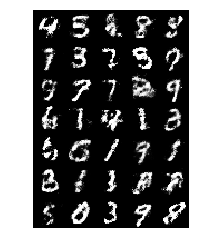

In [6]:
def generations(n, m):
    xg_batch = sess.run(xg, {z: z_batch(n*m), c: c_batch(n*m)})
    xg_batch = xg_batch.reshape([n, m, 28, 28])
    xg_rimgs = []
    for i in range(n):
        xg_rimgs.append(
            np.concatenate(xg_batch[i, :])
        )
    #plt.imshow(xg_batch[0, 0], cmap='gray')
    plt.imshow(np.hstack(xg_rimgs), cmap='gray')
    plt.axis('off')
    plt.show()

generations(5, 7)

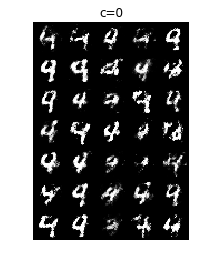

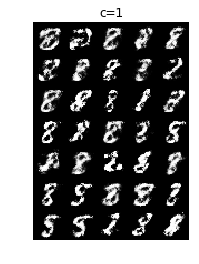

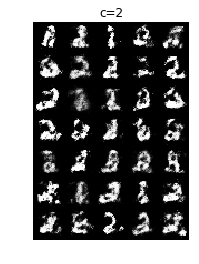

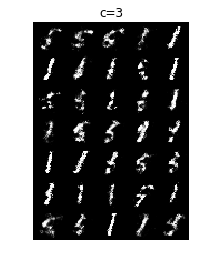

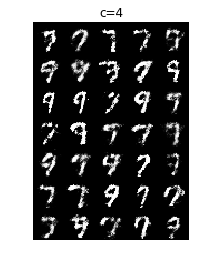

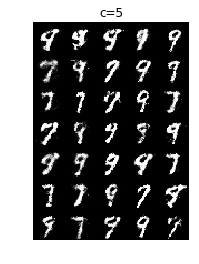

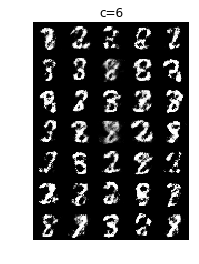

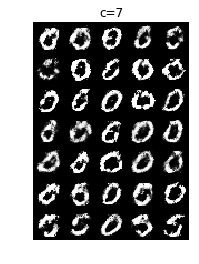

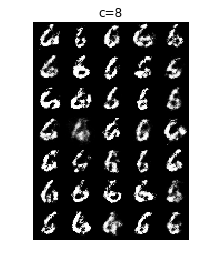

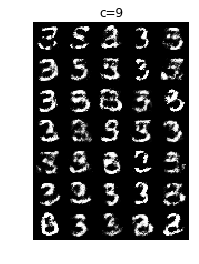

In [7]:
def generations(n, m, kc):
    kc_batch = np.zeros([n*m, C_SIZE])
    kc_batch[:, kc] = 1
    xg_batch = sess.run(xg, {z: z_batch(n*m), c: kc_batch})
    xg_batch = xg_batch.reshape([n, m, 28, 28])
    xg_rimgs = []
    for i in range(n):
        xg_rimgs.append(
            np.concatenate(xg_batch[i, :])
        )
    #plt.imshow(xg_batch[0, 0], cmap='gray')
    #plt.figure(figsize=[5, 5])
    plt.imshow(np.hstack(xg_rimgs), cmap='gray')
    plt.title('c=' + str(kc))
    plt.axis('off')
    plt.show()

for i in range(C_SIZE):
    generations(5, 7, i)

Mean accuracy: 0.6261742590560154


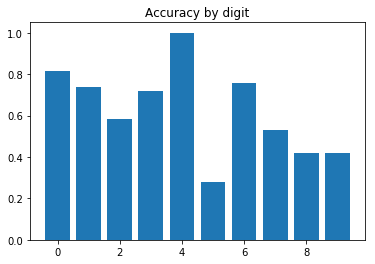

In [18]:
def classification_test():
    accs = []
    for i in range(10):
        xi_batch = mnist.test_imgs[mnist.test_labels == i]
        xic = np.argmax(sess.run(q_xc, {x: xi_batch}), 1)
        mpv = Counter(xic).most_common(1)[0][0]
        xic[xic != mpv] = 0
        xic[xic == mpv] = 1
        acc = np.mean(xic)
        accs.append(acc)
    return accs, np.mean(accs)

accs, macc = classification_test()
print('Mean accuracy:', macc)

plt.bar(range(10), accs)
plt.title('Accuracy by digit')
plt.show()